**1.Download the Dataset**

**2.Load the dataset into the tool**

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns

In [29]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [30]:
df.shape

(200, 5)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**3.Visualizations**

1.Univariate analysis

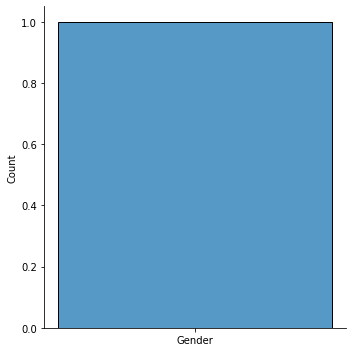

In [32]:
sns.displot('Gender')

Bivariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


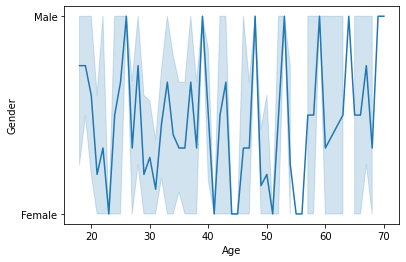

In [33]:
sns.lineplot(df.Age,df.Gender)

3.Multivariate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa87540e950>,
      dtype=object)

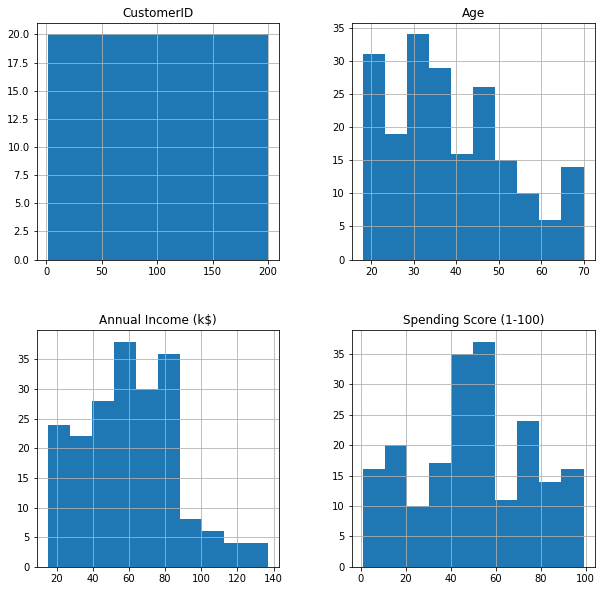

In [34]:
df.hist(figsize=(10,10))

**4.Descriptive statistics on the dataset**

In [35]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [36]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [37]:
df.Age.mean()

38.85

In [38]:
df.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

**5.Handling the missing values**

In [39]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

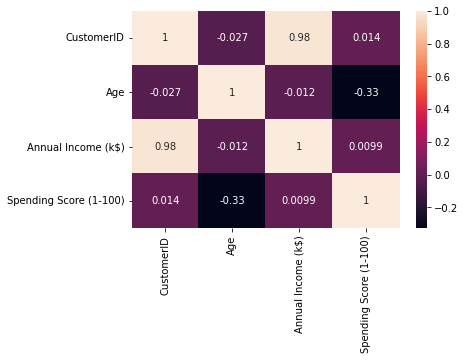

In [40]:
sns.heatmap(df.corr(),annot=True)

**6.Find the ouliers and replace them**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


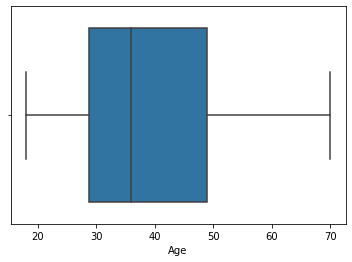

In [41]:
sns.boxplot(df.Age)

In [42]:
q1=df.Age.quantile(0.25)
q3=df.Age.quantile(0.75)

In [43]:
IQR=q3-q1

In [44]:
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR

In [45]:
upper_limit

79.375

In [46]:
df.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

In [47]:
df['Age']=np.where(df['Age']>upper_limit,79.37,df['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


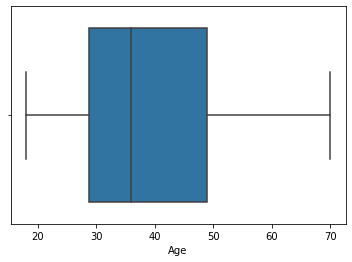

In [48]:
sns.boxplot(df.Age)

**7. Check for Categorical columns and perform encoding.**

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
le=LabelEncoder()

In [51]:
df.Gender=le.fit_transform(df.Gender)

In [52]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19.0,15,39
1,2,1,21.0,15,81
2,3,0,20.0,16,6
3,4,0,23.0,16,77
4,5,0,31.0,17,40


**9. Perform any of the clustering algorithms**

**10.Add the cluster data with the primary dataset**

In [57]:
df_main=pd.get_dummies(df,columns=['Gender'])
df_main.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_0,Gender_1
0,1,19.0,15,39,0,1
1,2,21.0,15,81,0,1
2,3,20.0,16,6,1,0
3,4,23.0,16,77,1,0
4,5,31.0,17,40,1,0


In [58]:
X=df_main.drop(columns=['Age'],axis=1)
X.head()

,CustomerID,Annual Income (k$),Spending Score (1-100),Gender_0,Gender_1
0,1,15,39,0,1
1,2,15,81,0,1
2,3,16,6,1,0
3,4,16,77,1,0
4,5,17,40,1,0


In [59]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [60]:
scaled_X=pd.DataFrame(scale.fit_transform(X),columns=X.columns)
scaled_X.head()

,CustomerID,Annual Income (k$),Spending Score (1-100),Gender_0,Gender_1
0,0.000000,0.000000,0.387755,0.0,1.0
1,0.005025,0.000000,0.816327,0.0,1.0
2,0.010050,0.008197,0.051020,1.0,0.0
3,0.015075,0.008197,0.775510,1.0,0.0
4,0.020101,0.016393,0.397959,1.0,0.0


In [61]:
new_df=scaled_X.iloc[:,:-1]
new_df.head()

,CustomerID,Annual Income (k$),Spending Score (1-100),Gender_0
0,0.000000,0.000000,0.387755,0.0
1,0.005025,0.000000,0.816327,0.0
2,0.010050,0.008197,0.051020,1.0
3,0.015075,0.008197,0.775510,1.0
4,0.020101,0.016393,0.397959,1.0


In [62]:
new_df.shape

(200, 4)

In [63]:
from sklearn import cluster

In [64]:
error=[]
for i in range(1,11):
  kmeans=cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmeans.fit(new_df)
  error.append(kmeans.inertia_)

In [65]:
km_model=cluster.KMeans(n_clusters=3,init='k-means++',random_state=0)

In [66]:
km_model.fit(new_df)

KMeans(n_clusters=3, random_state=0)

In [67]:
km_model.predict(new_df)

array([1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1,
       2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1], dtype=int32)

In [68]:
km_model.predict([[1,1,19,15]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


array([0], dtype=int32)

11.Split the data into dependent and independent
variables. 

In [69]:
df_main=pd.get_dummies(df,columns=['Gender'])
df_main.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_0,Gender_1
0,1,19.0,15,39,0,1
1,2,21.0,15,81,0,1
2,3,20.0,16,6,1,0
3,4,23.0,16,77,1,0
4,5,31.0,17,40,1,0


In [70]:
y=df_main['Age']
y

0      19.0
1      21.0
2      20.0
3      23.0
4      31.0
       ... 
195    35.0
196    45.0
197    32.0
198    32.0
199    30.0
Name: Age, Length: 200, dtype: float64

In [71]:
X=df_main.drop(columns=['Age'],axis=1)
X.head()

,CustomerID,Annual Income (k$),Spending Score (1-100),Gender_0,Gender_1
0,1,15,39,0,1
1,2,15,81,0,1
2,3,16,6,1,0
3,4,16,77,1,0
4,5,17,40,1,0


**8.Scaling the data**

In [72]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [73]:
scaled_X=pd.DataFrame(scale.fit_transform(X),columns=X.columns)
scaled_X.head()

,CustomerID,Annual Income (k$),Spending Score (1-100),Gender_0,Gender_1
0,0.000000,0.000000,0.387755,0.0,1.0
1,0.005025,0.000000,0.816327,0.0,1.0
2,0.010050,0.008197,0.051020,1.0,0.0
3,0.015075,0.008197,0.775510,1.0,0.0
4,0.020101,0.016393,0.397959,1.0,0.0



**10. Split the data into training and testing**

In [74]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(scaled_X,y,test_size=0.3,random_state=0)

In [75]:
x_train.shape

(140, 5)

In [76]:
x_test.shape

(60, 5)

In [77]:
y_train.shape

(140,)

In [78]:
y_test.shape

(60,)

11.Build the model, 12. Train the model, 13.Test the model 

In [79]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [80]:
r=Ridge()
l=Lasso()

In [81]:
r.fit(x_train,y_train)

Ridge()

In [82]:
l.fit(x_train,y_train)

Lasso()

In [83]:
pred1=r.predict(x_test)
pred1

array([41.108993  , 44.21919737, 39.58193131, 40.07765956, 36.98959395,
       44.17906338, 33.49359767, 41.08604909, 41.42187517, 41.71561073,
       38.15771644, 34.24479617, 40.52252888, 42.22676954, 38.80482038,
       31.18597883, 33.15876106, 44.48045787, 34.1813133 , 39.33797116,
       33.30392146, 33.20978189, 35.30680873, 34.85066516, 38.03130123,
       33.86256693, 34.38582157, 33.60218675, 36.6843282 , 40.08863313,
       38.85042994, 39.91400493, 43.55200766, 37.0942154 , 42.800201  ,
       33.78909388, 35.95836967, 38.14625786, 38.25731646, 37.62461718,
       45.0317882 , 37.39205565, 39.3702759 , 39.58827209, 40.97299023,
       36.21499008, 44.40341312, 38.43107277, 38.58711766, 33.04068079,
       38.43445902, 40.44742676, 39.65305302, 37.58085387, 34.12577006,
       41.70072949, 44.46495336, 39.77899052, 39.17264495, 37.32820657])

In [84]:
pred1_train=r.predict(x_train)
pred1_train

array([35.95287168, 37.97109547, 33.54491309, 30.75050788, 34.47966654,
       39.16716939, 37.9566908 , 32.32488946, 37.44804636, 36.50927496,
       34.94347026, 36.93144109, 36.24037562, 37.87385581, 44.19148788,
       38.07383313, 39.31810492, 43.1181119 , 37.06517143, 33.69176515,
       37.38812008, 36.6185365 , 44.39780598, 34.93577604, 39.96667492,
       37.12188847, 42.52050389, 39.32569223, 43.32455548, 37.15651395,
       35.82896353, 42.97710893, 43.07586964, 36.64349699, 41.65740981,
       44.20504976, 33.35589422, 41.13318466, 38.88349186, 38.66427156,
       45.59664288, 35.85022309, 37.04070263, 39.68415485, 38.62241446,
       38.79869912, 38.77142979, 38.71179577, 32.16973888, 33.25094289,
       37.77130125, 38.2894241 , 38.2921731 , 39.4368964 , 33.41094577,
       33.57635993, 35.45769274, 41.63068755, 32.86500428, 40.35134456,
       34.59052571, 37.23774785, 38.27570154, 36.799711  , 38.7807542 ,
       37.11408164, 33.3470967 , 38.54694613, 42.51088723, 44.63

In [85]:
pred2=l.predict(x_test)
pred2

array([38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1,
       38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1,
       38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1,
       38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1,
       38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1,
       38.1, 38.1, 38.1, 38.1, 38.1])

In [86]:
pred2_train=l.predict(x_train)
pred2_train

array([38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1,
       38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1,
       38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1,
       38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1,
       38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1,
       38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1,
       38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1,
       38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1,
       38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1,
       38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1,
       38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1,
       38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1,
       38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1])

In [87]:
Age=pd.DataFrame({'Actual':y_test,'Ridge_pred':pred1,'Lasso_pred':pred2})
Age.head(10)

,Actual,Ridge_pred,Lasso_pred
18,52.0,41.108993,38.1
170,40.0,44.219197,38.1
107,54.0,39.581931,38.1
98,48.0,40.077660,38.1
177,27.0,36.989594,38.1
182,46.0,44.179063,38.1
5,22.0,33.493598,38.1
146,48.0,41.086049,38.1
12,58.0,41.421875,38.1
152,44.0,41.715611,38.1


14. Measure the performance using Metrics.

In [88]:
from sklearn import metrics

In [89]:
print(metrics.r2_score(y_test,pred1))
print(metrics.r2_score(y_test,pred2))

0.1400547261913131
-0.03486944878375353


In [90]:
print(metrics.r2_score(y_train,pred1_train))
print(metrics.r2_score(y_train,pred2_train))

0.0728278343785499
0.0


In [91]:

print(metrics.mean_squared_error(y_test,pred1))
print(metrics.mean_squared_error(y_test,pred2))

154.13659087746908
185.49000000000004


In [92]:


print(np.sqrt(metrics.mean_squared_error(y_test,pred1)))
print(np.sqrt(metrics.mean_squared_error(y_test,pred2)))

12.415175829502742
13.619471355379401
